# Mission Simulation v2

Revisiting the simulation of HERON's mission timeline to verify the thermal, ADCS, and power designs.

### Setup Instructions

The following instructions should work for any operating system. If you are on a Windows system, the recommended setup is using the [Windows Subsystem for Linux](https://docs.microsoft.com/en-us/windows/wsl/about). These are the steps:

1. Install [conda 3](https://conda.io/en/latest/miniconda.html). If you are using WSL, the instructions [here](https://gist.github.com/kauffmanes/5e74916617f9993bc3479f401dfec7da). Conda is a python package manager to keep track of all the dependencies in your project, and it'll make it painless. Read [this guide](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).
2. Clone this github repository on your system using `git clone https://github.com/HeronMkII/mission-sim`
3. Load up the conda environment from the file `conda env create -f sims-env.yml` 
4. Activate the environment `source activate utat-sims`
5. Run the notebook server: `jupyter notebook`, and open up the link on your browser to run this notebook

In [6]:
%load_ext autoreload
%autoreload 2
%pylab inline
import numpy as n
import os.path
import datetime as dt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [7]:
# Physical Constants
o = 5.67*n.power(10.0,-8.0);     #Stephan-Boltzmann Constant

### 1. Satellite Components & Properties

In [ ]:
class Component(object):
    def __init__ (self, name, )

### 2. Orbit Properties

Define the $z$ axis of the satellite as the long axis. Assuming the current configuration of the magnets, the rotation of the satellite around the $z$ axis will be unconstrainted, but we can assume a constant rate of rotation (e.g. spit-roasting). Let's define $\theta$ as the angle between an incident ray from the sun and the $z$ axis of the satellite (antenna being at $+z$ and payload bottom cap being at $-z$.

In [ ]:
n.random

In [88]:
image = n.zeros((300, 300))

sun_xy = (0,150)
sun_radius = 80

earth_xy = (200, 150)
earth_radius = 20

def add_circle(image, xy, radius, values=1):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (i - xy[1])**2 + (j-xy[0])**2 < radius**2:
                image[i,j] = values
            
def add_cubesat(image, xy, sizes_xy, theta):
    xlen = sizes_xy[0]
    ylen = sizes_xy[1]
    
    # use a 2d rotation matrix
    R = n.array([[n.cos(theta), -n.sin(theta)], [n.sin(theta), n.cos(theta)]])
    
    

In [89]:
add_circle(image, sun_xy, sun_radius)
add_circle(image, earth_xy, earth_radius)

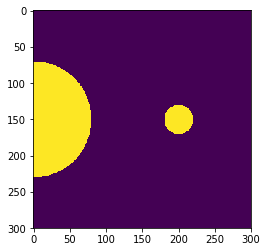

In [90]:
imshow(image)

In [87]:
# what we want from the orbit:
#     at any given t (minutes from launch), tell me what the effective area of each face is 
#     should be able to read that information from a file or calculate it 

class Orbit(object):
    def __init__(self, properties = None, from_file = False, path = None):
        self.from_file = from_file
        if from_file: 
            assert path is not None, "Provide a file to initialize orbit"
            self.from_file(filename)
            
        else:
            assert properties is not None, "Provide orbit properties to initialize orbit"
            self.p = properties
            for k in ['T', 'ltdn', 'z_rot']: assert k in self.p.keys(), "missing property" + k
            self.p['alpha'] = n.pi - self.p['ltdn']*(n.pi/2)/6#12 is 0, -6/+6 is pi/2, 0 is 0
            

In [53]:
orbital_properties = {'T' : 90, # period (minutes)
                      'ltdn' : 12, #24hr clock , 13:30 is 13.5, 6.15am is 6.25 etc.
                      'altitude' : 550,
                      'zrot' : 0.1 # rad/s}
                     }

In [13]:
thermal_properties = {'a' : 0.72,
                      'e' : 0.58,
                      'area' : 0.1418}